In [5]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Add Dash for interactive web dashboards
import dash
from dash import dcc, html, Input, Output, callback

In [6]:

# Housing price indices with proper encoding handling
try:
    housing_price_index1 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/408_DT_40803_N0001_20250511202745.csv', encoding='utf-8')
except UnicodeDecodeError:
    housing_price_index1 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/408_DT_40803_N0001_20250511202745.csv', encoding='cp949')

try:
    housing_price_index2 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/408_DT_40803_N0003_20250511203207.csv', encoding='utf-8')
except UnicodeDecodeError:
    housing_price_index2 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/408_DT_40803_N0003_20250511203207.csv', encoding='cp949')

try:
    housing_price_index3 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/408_DT_40803_N0001_20250511203003.csv', encoding='utf-8')
except UnicodeDecodeError:
    housing_price_index3 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/408_DT_40803_N0001_20250511203003.csv', encoding='cp949')

# Expenses data with encoding handling
try:
    expenses_by_year1 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Average_monthly_income__expenditure__urban_excl.1_person_and_farm__20250511200700.csv', encoding='utf-8')
except UnicodeDecodeError:
    expenses_by_year1 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Average_monthly_income__expenditure__urban_excl.1_person_and_farm__20250511200700.csv', encoding='cp949')

try:
    expenses_by_year2 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Average_monthly_income__expenditure__whole_excl.1_person_and_farm__20250511200421.csv', encoding='utf-8')
except UnicodeDecodeError:
    expenses_by_year2 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Average_monthly_income__expenditure__whole_excl.1_person_and_farm__20250511200421.csv', encoding='cp949')

# Housing data with encoding handling
try:
    housing_price_index_by_housingtype = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Housing_Transaction_Price_Index_by_House_Type__2011.6100__20250511205317.csv', encoding='utf-8')
except UnicodeDecodeError:
    housing_price_index_by_housingtype = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Housing_Transaction_Price_Index_by_House_Type__2011.6100__20250511205317.csv', encoding='cp949')

try:
    number_house_owners_byage = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Number_of_house_ownership_and_nonownership_households_by_residence_area_20250511203944.csv', encoding='utf-8')
except UnicodeDecodeError:
    number_house_owners_byage = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Number_of_house_ownership_and_nonownership_households_by_residence_area_20250511203944.csv', encoding='cp949')

try:
    house_ownership_nonownership = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Number_of_house_ownership_and_nonownership_households_by_residence_area_20250511203944.csv', encoding='utf-8')
except UnicodeDecodeError:
    house_ownership_nonownership = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Number_of_house_ownership_and_nonownership_households_by_residence_area_20250511203944.csv', encoding='cp949')

try:
    number_houses_per1000 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Number_of_Houses_per_1_000_people_20250511203641.csv', encoding='utf-8')
except UnicodeDecodeError:
    number_houses_per1000 = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Number_of_Houses_per_1_000_people_20250511203641.csv', encoding='cp949')

try:
    transaction_based_index = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Transactionbased_Sales_Price_Indices_2017.11100.0__20250511201206.csv', encoding='utf-8')
except UnicodeDecodeError:
    transaction_based_index = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Transactionbased_Sales_Price_Indices_2017.11100.0__20250511201206.csv', encoding='cp949')

# Unsold housing data with encoding handling
try:
    unsold_housing = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Unsold_Housings__Total__20250511201332.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        unsold_housing = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Unsold_Housings__Total__20250511201332.csv', encoding='cp949')
    except UnicodeDecodeError:
        try:
            unsold_housing = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Unsold_Housings__Total__20250511201332.csv', encoding='euc-kr')
        except UnicodeDecodeError:
            unsold_housing = pd.read_csv('/home/unsmartboy/Documents/housing_forecast/housing_price/data/Unsold_Housings__Total__20250511201332.csv', encoding='latin-1')

print("All datasets loaded successfully!")
print(f"Loaded {len([housing_price_index1, housing_price_index2, housing_price_index3, expenses_by_year1, expenses_by_year2, housing_price_index_by_housingtype, number_house_owners_byage, house_ownership_nonownership, number_houses_per1000, transaction_based_index, unsold_housing])} datasets")

All datasets loaded successfully!
Loaded 11 datasets


In [7]:
housing_price_index1.head()

,Type,Region,PERIOD,Sales Price Index,Unnamed: 4
0,Total,TheWholeCountry,2003.11 Month,61.451824,NaN
1,Total,TheWholeCountry,2003.12 Month,60.963185,NaN
2,Total,TheWholeCountry,2004.01 Month,60.652009,NaN
3,Total,TheWholeCountry,2004.02 Month,60.743829,NaN
4,Total,TheWholeCountry,2004.03 Month,60.842376,NaN


In [8]:
housing_price_index1['Unnamed: 4'].unique()

array([nan])

In [9]:
housing_price_index2.head()

,Type,Region,Scale,PERIOD,Sales Price Index,Unnamed: 5
0,Apartments,TheWholeCountry,Scale1,2017.11 Month,98.479263,NaN
1,Apartments,TheWholeCountry,Scale1,2017.12 Month,98.497161,NaN
2,Apartments,TheWholeCountry,Scale1,2018.01 Month,98.433445,NaN
3,Apartments,TheWholeCountry,Scale1,2018.02 Month,98.365790,NaN
4,Apartments,TheWholeCountry,Scale1,2018.03 Month,98.207246,NaN


In [10]:
housing_price_index3.head()

,Type,Region,PERIOD,Sales Price Index,Unnamed: 4
0,Total,TheWholeCountry,2020.12 Month,95.164482,NaN
1,Total,TheWholeCountry,2021.01 Month,95.916997,NaN
2,Total,TheWholeCountry,2021.02 Month,96.775353,NaN
3,Total,TheWholeCountry,2021.03 Month,97.487219,NaN
4,Total,TheWholeCountry,2021.04 Month,98.175421,NaN


In [11]:
expenses_by_year1.head()

,By the item of monthly income & expenditure of household,1990.1/4,1990.1/4.1,1990.1/4.2,1990.2/4,1990.2/4.1,1990.2/4.2,1990.3/4,1990.3/4.1,1990.3/4.2,...,2019.1/4.2,2019.2/4,2019.2/4.1,2019.2/4.2,2019.3/4,2019.3/4.1,2019.3/4.2,2019.4/4,2019.4/4.1,2019.4/4.2
0,By the item of monthly income & expenditure of...,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households,...,Other households,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households
1,The number of hosehold members (Person),4.00,3.97,4.05,3.98,3.97,4.02,4.01,3.98,4.06,...,2.88,3.07,3.18,2.90,3.06,3.18,2.88,3.07,3.19,2.89
2,Age of household's head (Age),38.67,37.11,41.85,38.66,37.23,41.65,38.74,37.30,41.75,...,59.02,53.17,49.51,58.75,53.21,49.52,58.83,53.34,49.67,59.03
3,Distribution of households (%),100.00,67.17,32.83,100.00,67.66,32.34,100.00,67.78,32.22,...,40.94,100.00,60.41,39.59,100.00,60.33,39.67,100.00,60.74,39.26
4,Income (Won),880499,890099,860860,893567,893907,892856,955067,978042,906743,...,3846639,4802320,5374467,3929180,4983946,5690639,3909227,4880947,5494686,3931339


In [12]:
expenses_by_year2.head()

,By the item of monthly income & expenditure of household,2003.1/4,2003.1/4.1,2003.1/4.2,2003.2/4,2003.2/4.1,2003.2/4.2,2003.3/4,2003.3/4.1,2003.3/4.2,...,2019.1/4.2,2019.2/4,2019.2/4.1,2019.2/4.2,2019.3/4,2019.3/4.1,2019.3/4.2,2019.4/4,2019.4/4.1,2019.4/4.2
0,By the item of monthly income & expenditure of...,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households,...,Other households,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households
1,The number of hosehold members (Person),3.46,3.53,3.37,3.45,3.51,3.36,3.44,3.50,3.36,...,2.86,3.06,3.18,2.88,3.05,3.18,2.86,3.06,3.19,2.87
2,Age of household's head (Age),44.78,41.81,48.85,44.90,42.00,49.06,45.05,42.36,48.77,...,59.15,53.41,49.64,59.00,53.51,49.73,59.08,53.68,49.92,59.30
3,Distribution of households (%),100.00,57.76,42.24,100.00,58.95,41.05,100.00,58.11,41.89,...,41.87,100.00,59.74,40.26,100.00,59.50,40.51,100.00,59.93,40.07
4,Income (Won),2582089,2845840,2221416,2558371,2788401,2228076,2672267,2964442,2266949,...,3740508,4704176,5296373,3825333,4876856,5609633,3800549,4771921,5411583,3815300


In [13]:
housing_price_index_by_housingtype.head()

,Region,By Housing Type,1986.01,1986.02,1986.03,1986.04,1986.05,1986.06,1986.07,1986.08,...,2012.03,2012.04,2012.05,2012.06,2012.07,2012.08,2012.09,2012.10,2012.11,2012.12
0,Whole Country,Total,40.2,40.2,40.3,40.0,39.8,39.6,39.5,39.5,...,102.9,103.0,103.1,103.0,102.9,102.8,102.7,102.6,102.5,102.4
1,Whole Country,Apartments,24.7,24.7,24.7,24.5,24.4,24.2,24.1,24.0,...,103.9,104.0,104.1,104.0,103.9,103.7,103.5,103.3,103.2,103.1
2,Whole Country,single,69.4,69.4,69.6,69.1,68.9,68.7,68.6,68.6,...,101.6,101.7,101.9,101.9,102.0,102.0,102.0,102.1,102.1,102.1
3,Whole Country,Row Houses,47.0,46.8,46.6,46.6,45.6,45.5,45.4,45.4,...,101.2,101.2,101.2,101.2,101.0,101.0,100.9,100.8,100.8,100.7
4,Seoul,Total,35.6,35.6,35.6,35.4,35.1,34.8,34.7,34.7,...,99.3,99.1,98.9,98.7,98.3,98.0,97.6,97.2,97.0,96.7


In [14]:
number_house_owners_byage.head()

,By residential area(1),2015,2015.1,2015.2,2016,2016.1,2016.2,2017,2017.1,2017.2,...,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2,2023,2023.1,2023.2
0,By residential area(1),Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,...,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households
1,Whole country,19111030,10698686,8412344,19367696,10743492,8624204,19673875,11000007,8673868,...,9196539,21448463,12062871,9385592,21773507,12232407,9541100,22073158,12454684,9618474
2,Seoul,3784490,1875295,1909195,3784705,1864059,1920646,3813260,1875189,1938071,...,2054216,4046799,1974544,2072255,4098818,1991345,2107473,4141659,1998410,2143249
3,Busan,1335900,786367,549533,1344170,783542,560628,1354401,791489,562912,...,595657,1431365,822769,608596,1447825,831691,616134,1462404,845691,616713
4,Daegu,928528,533011,395517,935753,537709,398044,948030,550374,397656,...,416192,1000931,579620,421311,1010834,586337,424497,1033238,603118,430120


In [15]:
house_ownership_nonownership.head()

,By residential area(1),2015,2015.1,2015.2,2016,2016.1,2016.2,2017,2017.1,2017.2,...,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2,2023,2023.1,2023.2
0,By residential area(1),Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,...,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households
1,Whole country,19111030,10698686,8412344,19367696,10743492,8624204,19673875,11000007,8673868,...,9196539,21448463,12062871,9385592,21773507,12232407,9541100,22073158,12454684,9618474
2,Seoul,3784490,1875295,1909195,3784705,1864059,1920646,3813260,1875189,1938071,...,2054216,4046799,1974544,2072255,4098818,1991345,2107473,4141659,1998410,2143249
3,Busan,1335900,786367,549533,1344170,783542,560628,1354401,791489,562912,...,595657,1431365,822769,608596,1447825,831691,616134,1462404,845691,616713
4,Daegu,928528,533011,395517,935753,537709,398044,948030,550374,397656,...,416192,1000931,579620,421311,1010834,586337,424497,1033238,603118,430120


In [16]:
number_houses_per1000.head()

,Classification(1),1995,1995.1,1995.2,2000,2000.1,2000.2,2005,2005.1,2005.2,...,2022.2,2022.3,2022.4,2022.5,2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,Classification(1),Population figures,The number of houses,The number of houses per 1000 people,Population figures,The number of houses,The number of houses per 1000 people,Population figures,The number of houses,The number of houses per 1000 people,...,The number of houses per 1000 people,Number of population,,,Population figures,The number of houses,The number of houses per 1000 people,Number of population,,
1,Whoe Country,44608.7,9570.4,214.5,46136.1,11472.4,248.7,47279.0,15622.5,330.4,...,0.0,51692.3,22236.9,430.2,0.0,0.0,0.0,51774.5,22623.9,437.0
2,Capital Area,20189.1,3859.4,191.2,21354.5,4731.2,221.6,22766.9,7165.0,314.7,...,0.0,26124.4,10357.8,396.5,0.0,0.0,0.0,26225.8,10573.7,403.2
3,Seoul,10231.2,1727.9,168.9,9895.2,1973.2,199.4,9820.2,3102.2,315.9,...,0.0,9417.5,3839.8,407.7,0.0,0.0,0.0,9384.5,3878.5,413.3
4,Busan,3814.3,677.0,177.5,3662.9,830.2,226.7,3523.6,1161.0,329.5,...,0.0,3295.8,1485.6,450.8,0.0,0.0,0.0,3279.6,1505.4,459.0


In [17]:
transaction_based_index.head()

,Area(1),Area(2),2006.01,2006.02,2006.03,2006.04,2006.05,2006.06,2006.07,2006.08,...,2024.06,2024.07,2024.08,2024.09,2024.10,2024.11,2024.12,2025.01,2025.02,2025.03 p)
0,Area(1),Area(2),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),...,Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),Price Indices (2017.11 = 100.0),rates (%)
1,The Whole Country,Sub Summary,60.0,60.5,61.2,61.7,62.0,62.5,62.6,63.5,...,123.4,124.3,125.1,125.2,125.2,124.7,124.1,123.8,124.3,0.30
2,Seoul Metropolitan Area,Sub Summary,62.8,63.7,64.8,65.6,66.2,66.5,66.8,67.8,...,143.8,145.7,147.3,147.5,147.4,146.9,146.1,146.1,147.1,0.55
3,Non-Seoul Metropolitan Area,Sub Summary,57.7,57.6,57.7,57.7,57.7,58.4,58.3,58.8,...,106.4,106.5,106.6,106.8,106.8,106.3,105.8,105.4,105.3,0.01
4,Seoul,Seoul,58.4,59.4,60.9,61.6,61.8,61.8,62.2,63.0,...,164.1,167.8,170.5,170.8,170.8,171.0,170.4,170.9,173.4,0.75


In [18]:
unsold_housing.head()

,Classification(1),Classification(1).1,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,unsold By sector,Total,0,0,0,0,0,0,112254,165599,...,61512,56413,57330,58838,47797,19005,17710,68107,62489,70173
1,unsold By sector,Private Sector,0,0,0,0,0,0,110715,164293,...,61512,56413,57330,58838,47797,19005,17710,68107,62489,70173
2,unsold By sector,Public Sector,0,0,0,0,0,0,1539,1306,...,0,0,0,0,0,0,0,0,0,0
3,unsold By sector,After Construction,0,0,0,0,0,0,17395,46476,...,10518,10011,11720,16738,18065,12006,7449,7518,10857,21480
4,unsold By si-do,Whole Country,31512,24923,38261,69133,57215,73772,112254,165599,...,61512,56413,57330,58838,47797,19005,17710,68107,62489,70173


In [19]:
# shape for each dataset
print("Shapes of the datasets:")
print(f"household_ratio_by_province: {household_ratio_by_province.shape}")
print(f"housing_price_index1: {housing_price_index1.shape}")
print(f"housing_price_index2: {housing_price_index2.shape}")
print(f"housing_price_index3: {housing_price_index3.shape}")
print(f"expenses_by_year1: {expenses_by_year1.shape}")
print(f"expenses_by_year2: {expenses_by_year2.shape}")
print(f"housing_price_index_by_housingtype: {housing_price_index_by_housingtype.shape}")
print(f"number_house_owners_byage: {number_house_owners_byage.shape}")
print(f"house_ownership_nonownership: {house_ownership_nonownership.shape}")
print(f"number_houses_per1000: {number_houses_per1000.shape}")
print(f"transaction_based_index: {transaction_based_index.shape}")
print(f"unsold_housing: {unsold_housing.shape}")

Shapes of the datasets:


NameError: name 'household_ratio_by_province' is not defined

In [ ]:
# check for missing values in each dataset
print("\nMissing values in each dataset:")
print(f"household_ratio_by_province: {household_ratio_by_province.isnull().sum().sum()}")
print(f"housing_price_index1: {housing_price_index1.isnull().sum().sum()}")  
print(f"housing_price_index2: {housing_price_index2.isnull().sum().sum()}")
print(f"housing_price_index3: {housing_price_index3.isnull().sum().sum()}")
print(f"expenses_by_year1: {expenses_by_year1.isnull().sum().sum()}")
print(f"expenses_by_year2: {expenses_by_year2.isnull().sum().sum()}")
print(f"housing_price_index_by_housingtype: {housing_price_index_by_housingtype.isnull().sum().sum()}")
print(f"number_house_owners_byage: {number_house_owners_byage.isnull().sum().sum()}")
print(f"house_ownership_nonownership: {house_ownership_nonownership.isnull().sum().sum()}")
print(f"number_houses_per1000: {number_houses_per1000.isnull().sum().sum()}")
print(f"transaction_based_index: {transaction_based_index.isnull().sum().sum()}")
print(f"unsold_housing: {unsold_housing.isnull().sum().sum()}")


Missing values in each dataset:
household_ratio_by_province: 102
housing_price_index1: 96283
housing_price_index2: 78052
housing_price_index3: 27962
expenses_by_year1: 0
expenses_by_year2: 0
housing_price_index_by_housingtype: 0
number_house_owners_byage: 0
house_ownership_nonownership: 0
number_houses_per1000: 0
transaction_based_index: 0
unsold_housing: 0


In [ ]:
# dropping NaN columns
household_ratio_by_province = household_ratio_by_province.dropna(axis=1, how='all')
housing_price_index1 = housing_price_index1.dropna(axis=1, how='all')
housing_price_index2 = housing_price_index2.dropna(axis=1, how='all')
housing_price_index3 = housing_price_index3.dropna(axis=1, how='all')
expenses_by_year1 = expenses_by_year1.dropna(axis=1, how='all')
expenses_by_year2 = expenses_by_year2.dropna(axis=1, how='all')
housing_price_index_by_housingtype = housing_price_index_by_housingtype.dropna(axis=1, how='all')
number_house_owners_byage = number_house_owners_byage.dropna(axis=1, how='all')
house_ownership_nonownership = house_ownership_nonownership.dropna(axis=1, how='all')
number_houses_per1000 = number_houses_per1000.dropna(axis=1, how='all')
transaction_based_index = transaction_based_index.dropna(axis=1, how='all')
unsold_housing = unsold_housing.dropna(axis=1, how='all')

In [ ]:
combined_housing_price_index = pd.concat([housing_price_index1, housing_price_index2, housing_price_index3], ignore_index=True)
combined_housing_price_index.drop(columns=['Scale'], inplace=True)

combined_housing_price_index.head()

,Type,Region,PERIOD,Sales Price Index
0,Total,TheWholeCountry,2003.11 Month,61.451824
1,Total,TheWholeCountry,2003.12 Month,60.963185
2,Total,TheWholeCountry,2004.01 Month,60.652009
3,Total,TheWholeCountry,2004.02 Month,60.743829
4,Total,TheWholeCountry,2004.03 Month,60.842376


In [ ]:
combined_housing_price_index.tail()

,Type,Region,PERIOD,Sales Price Index
202292,Detached Houses,Jeju,2024.11 Month,101.282981
202293,Detached Houses,Jeju,2024.12 Month,101.188204
202294,Detached Houses,Jeju,2025.01 Month,101.094264
202295,Detached Houses,Jeju,2025.02 Month,100.970979
202296,Detached Houses,Jeju,2025.03 Month,100.868893


In [ ]:
combined_expenses_by_year = pd.concat([expenses_by_year1, expenses_by_year2], ignore_index=True)
combined_expenses_by_year.head()

,By the item of monthly income & expenditure of household,1990.1/4,1990.1/4.1,1990.1/4.2,1990.2/4,1990.2/4.1,1990.2/4.2,1990.3/4,1990.3/4.1,1990.3/4.2,...,2019.1/4.2,2019.2/4,2019.2/4.1,2019.2/4.2,2019.3/4,2019.3/4.1,2019.3/4.2,2019.4/4,2019.4/4.1,2019.4/4.2
0,By the item of monthly income & expenditure of...,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households,...,Other households,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households,All households,Salary & wage earners' households,Other households
1,The number of hosehold members (Person),4.00,3.97,4.05,3.98,3.97,4.02,4.01,3.98,4.06,...,2.88,3.07,3.18,2.90,3.06,3.18,2.88,3.07,3.19,2.89
2,Age of household's head (Age),38.67,37.11,41.85,38.66,37.23,41.65,38.74,37.30,41.75,...,59.02,53.17,49.51,58.75,53.21,49.52,58.83,53.34,49.67,59.03
3,Distribution of households (%),100.00,67.17,32.83,100.00,67.66,32.34,100.00,67.78,32.22,...,40.94,100.00,60.41,39.59,100.00,60.33,39.67,100.00,60.74,39.26
4,Income (Won),880499,890099,860860,893567,893907,892856,955067,978042,906743,...,3846639,4802320,5374467,3929180,4983946,5690639,3909227,4880947,5494686,3931339


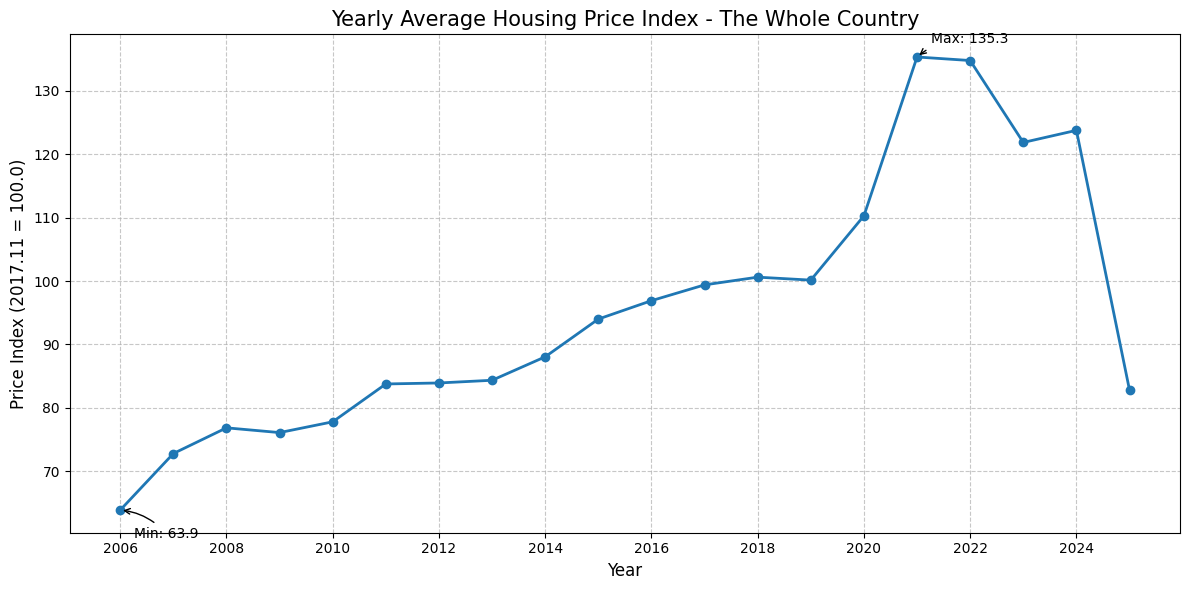

In [ ]:
# Filter for "The Whole Country" data
whole_country_data = transaction_based_index[transaction_based_index['Area(1)'] == 'The Whole Country']

# Extract period columns (those that look like '2006.01')
import re
period_cols = [col for col in whole_country_data.columns if re.match(r'\d{4}\.\d{2}', col)]

# Get values for those period columns only
values = whole_country_data.loc[whole_country_data.index[0], period_cols].astype(float)

# Create DataFrame with matched periods and values
data = pd.DataFrame({
    'period': period_cols,
    'value': values.values
})

# Extract year from period column
data['year'] = data['period'].str.split('.', expand=True)[0].astype(int)

# Group by year and calculate average for each year
yearly_avg = data.groupby('year')['value'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['year'], yearly_avg['value'], marker='o', linewidth=2)
plt.title('Yearly Average Housing Price Index - The Whole Country', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price Index (2017.11 = 100.0)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_avg['year'][::2])  # Show every other year on x-axis to avoid crowding

# Add annotations for key points (highest and lowest values)
max_idx = yearly_avg['value'].idxmax()
min_idx = yearly_avg['value'].idxmin()
plt.annotate(f'Max: {yearly_avg["value"].max():.1f}', 
             xy=(yearly_avg['year'][max_idx], yearly_avg['value'][max_idx]),
             xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.annotate(f'Min: {yearly_avg["value"].min():.1f}', 
             xy=(yearly_avg['year'][min_idx], yearly_avg['value'][min_idx]),
             xytext=(10, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.tight_layout()
plt.show()

# Save the yearly_avg DataFrame for the next cell
# This ensures the variable is available even if cells are run out of order
globals()['yearly_avg'] = yearly_avg

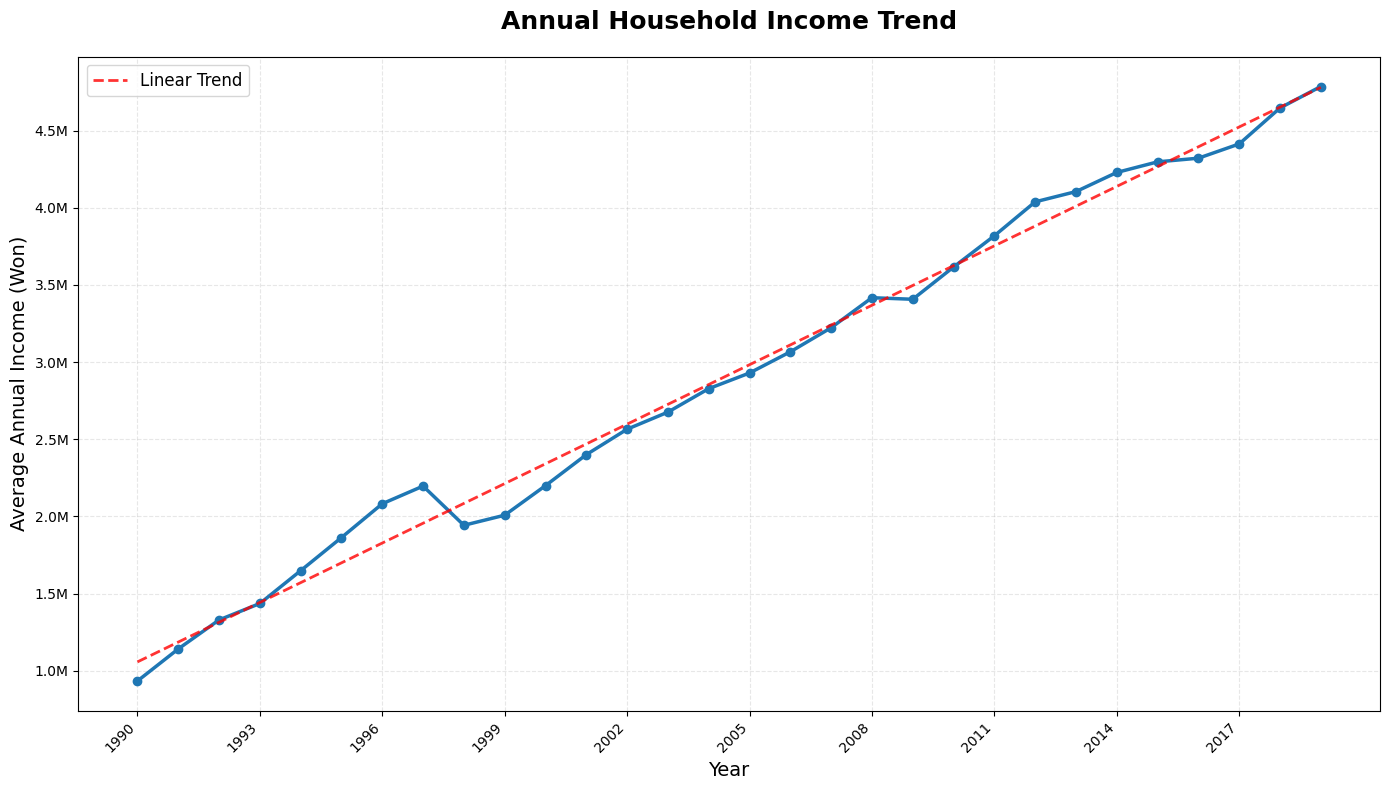

Annual Income Statistics:
Data Period: 1990 - 2019
Minimum Annual Income: 934,494 Won (1990)
Maximum Annual Income: 4,785,104 Won (2019)
Average Annual Income: 2,918,907 Won
Total Income Growth: 412.1% over 29 years
Average Annual Growth Rate: 5.79%
Recent 5-year growth: 11.4%


In [ ]:

# Extract the Income (Won) row (row index 4)
income_row = combined_expenses_by_year.iloc[4]

# Get the column names (time periods) - skip the first column which contains the row labels
time_periods = combined_expenses_by_year.columns[1:]  # Skip first column with row descriptions
income_values = income_row.iloc[1:]  # Skip first column with row description

# Convert to numeric values (in case they're strings)
income_values = pd.to_numeric(income_values, errors='coerce')

# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'period': time_periods,
    'income': income_values
})

# Extract year from period (assuming format like "1990.1/4", "1990.2/4", etc.)
df['year'] = df['period'].str.extract(r'(\d{4})').astype(int)

# Aggregate by year - calculate mean income for each year
yearly_income = df.groupby('year')['income'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(yearly_income['year'], yearly_income['income'], 
         marker='o', linewidth=2.5, markersize=6, color='#1f77b4')

# Customize the plot
plt.title('Annual Household Income Trend', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Annual Income (Won)', fontsize=14)

# Format y-axis to show values in millions for better readability
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))

# Set x-axis to show every few years
years = yearly_income['year'].values
plt.xticks(years[::3], rotation=45, ha='right')  # Show every 3rd year

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Add trend line
if len(yearly_income) > 1:
    # Calculate trend line using numpy polyfit
    x_numeric = yearly_income['year'].values
    y_numeric = yearly_income['income'].values
    z = np.polyfit(x_numeric, y_numeric, 1)
    p = np.poly1d(z)
    plt.plot(x_numeric, p(x_numeric), "--r", alpha=0.8, linewidth=2, label='Linear Trend')
    plt.legend(fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Print statistics
print("Annual Income Statistics:")
print(f"Data Period: {yearly_income['year'].min()} - {yearly_income['year'].max()}")
print(f"Minimum Annual Income: {yearly_income['income'].min():,.0f} Won ({yearly_income.loc[yearly_income['income'].idxmin(), 'year']})")
print(f"Maximum Annual Income: {yearly_income['income'].max():,.0f} Won ({yearly_income.loc[yearly_income['income'].idxmax(), 'year']})")
print(f"Average Annual Income: {yearly_income['income'].mean():,.0f} Won")
print(f"Total Income Growth: {((yearly_income['income'].iloc[-1] / yearly_income['income'].iloc[0]) - 1) * 100:.1f}% over {yearly_income['year'].iloc[-1] - yearly_income['year'].iloc[0]} years")

# Calculate annual growth rate
if len(yearly_income) > 1:
    years_span = yearly_income['year'].iloc[-1] - yearly_income['year'].iloc[0]
    annual_growth_rate = ((yearly_income['income'].iloc[-1] / yearly_income['income'].iloc[0]) ** (1/years_span) - 1) * 100
    print(f"Average Annual Growth Rate: {annual_growth_rate:.2f}%")

# Show recent trends (last 5 years if available)
if len(yearly_income) >= 5:
    recent_data = yearly_income.tail(5)
    recent_growth = ((recent_data['income'].iloc[-1] / recent_data['income'].iloc[0]) - 1) * 100
    print(f"Recent 5-year growth: {recent_growth:.1f}%")

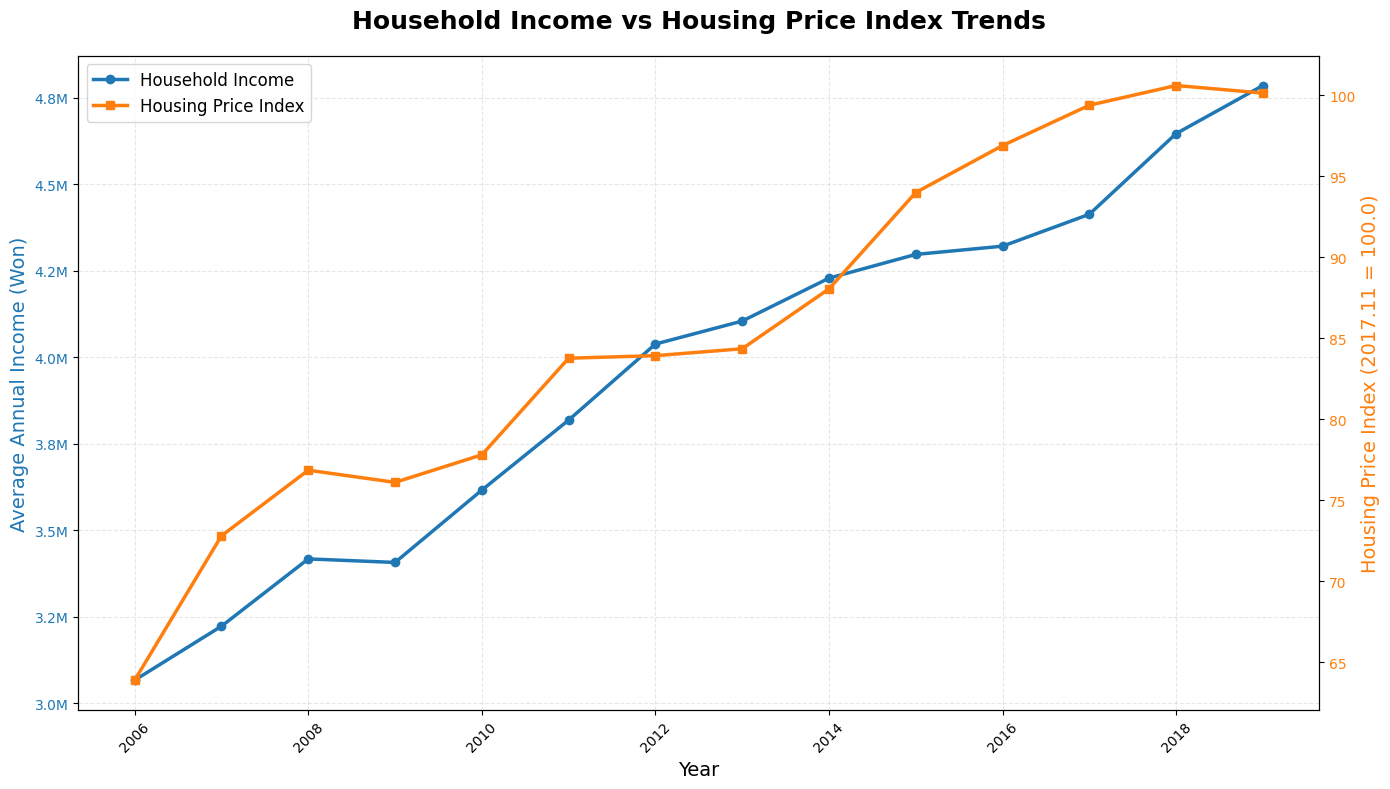

INCOME vs HOUSING PRICE ANALYSIS
Time Period: 2006 - 2019
Correlation Coefficient: 0.967
Correlation Strength: Strong

INCOME TRENDS:
  Starting Income (2006): 3,066,740 Won
  Ending Income (2019): 4,785,104 Won
  Total Income Growth: 56.0%

HOUSING PRICE TRENDS:
  Starting Index (2006): 63.9
  Ending Index (2019): 100.1
  Total Housing Price Growth: 56.7%

AFFORDABILITY ANALYSIS:
  Housing prices grew 0.7 percentage points faster than income
  → Housing became LESS affordable over this period


In [ ]:
import matplotlib.pyplot as plt

# First, get the housing price data (using your existing code)
whole_country_data = transaction_based_index[transaction_based_index['Area(1)'] == 'The Whole Country']

# Extract period columns for housing data
import re
period_cols = [col for col in whole_country_data.columns if re.match(r'\d{4}\.\d{2}', col)]

# Get housing price values
housing_values = whole_country_data.loc[whole_country_data.index[0], period_cols].astype(float)

# Create DataFrame for housing data
housing_data = pd.DataFrame({
    'period': period_cols,
    'housing_price': housing_values.values
})

# Extract year from period column for housing data
housing_data['year'] = housing_data['period'].str.split('.', expand=True)[0].astype(int)

# Group by year and calculate average for each year (housing)
yearly_housing = housing_data.groupby('year')['housing_price'].mean().reset_index()

# Filter housing data to stop at 2019
yearly_housing = yearly_housing[yearly_housing['year'] <= 2019].reset_index(drop=True)

# Now get the income data and filter for the same time period
income_row = combined_expenses_by_year.iloc[4]
time_periods = combined_expenses_by_year.columns[1:]
income_values = pd.to_numeric(income_row.iloc[1:], errors='coerce')

# Create DataFrame for income data
income_data = pd.DataFrame({
    'period': time_periods,
    'income': income_values
})

# Extract year from income period (assuming format like "1990.1/4")
income_data['year'] = income_data['period'].str.extract(r'(\d{4})').astype(int)

# Group by year and calculate average for each year (income)
yearly_income = income_data.groupby('year')['income'].mean().reset_index()

# Filter income data to match housing data time period
min_year = yearly_housing['year'].min()
max_year = yearly_housing['year'].max()
yearly_income_filtered = yearly_income[
    (yearly_income['year'] >= min_year) & 
    (yearly_income['year'] <= max_year)
].reset_index(drop=True)

# Create the combined plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot income on left y-axis
color1 = '#1f77b4'  # Blue
line1 = ax1.plot(yearly_income_filtered['year'], yearly_income_filtered['income'], 
                 marker='o', linewidth=2.5, markersize=6, color=color1, label='Household Income')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average Annual Income (Won)', fontsize=14, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Format y-axis for income (in millions)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))

# Create second y-axis for housing price
ax2 = ax1.twinx()
color2 = '#ff7f0e'  # Orange
line2 = ax2.plot(yearly_housing['year'], yearly_housing['housing_price'], 
                 marker='s', linewidth=2.5, markersize=6, color=color2, label='Housing Price Index')
ax2.set_ylabel('Housing Price Index (2017.11 = 100.0)', fontsize=14, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Set title
plt.title('Household Income vs Housing Price Index Trends', fontsize=18, fontweight='bold', pad=20)

# Add grid
ax1.grid(True, alpha=0.3, linestyle='--')

# Set x-axis ticks
years = yearly_housing['year'].values
ax1.set_xticks(years[::2])  # Show every other year
ax1.tick_params(axis='x', rotation=45)

# Create combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

# Calculate and display correlation and insights
common_years = set(yearly_income_filtered['year']).intersection(set(yearly_housing['year']))
if len(common_years) > 1:
    # Merge data for correlation analysis
    merged_data = pd.merge(yearly_income_filtered, yearly_housing, on='year', how='inner')
    
    if len(merged_data) > 1:
        correlation = merged_data['income'].corr(merged_data['housing_price'])
        
        print("="*60)
        print("INCOME vs HOUSING PRICE ANALYSIS")
        print("="*60)
        print(f"Time Period: {merged_data['year'].min()} - {merged_data['year'].max()}")
        print(f"Correlation Coefficient: {correlation:.3f}")
        
        if abs(correlation) > 0.7:
            correlation_strength = "Strong"
        elif abs(correlation) > 0.3:
            correlation_strength = "Moderate"
        else:
            correlation_strength = "Weak"
        
        print(f"Correlation Strength: {correlation_strength}")
        print()
        
        # Income statistics for the period
        print("INCOME TRENDS:")
        print(f"  Starting Income ({merged_data['year'].min()}): {merged_data['income'].iloc[0]:,.0f} Won")
        print(f"  Ending Income ({merged_data['year'].max()}): {merged_data['income'].iloc[-1]:,.0f} Won")
        income_growth = ((merged_data['income'].iloc[-1] / merged_data['income'].iloc[0]) - 1) * 100
        print(f"  Total Income Growth: {income_growth:.1f}%")
        
        # Housing price statistics for the period
        print("\nHOUSING PRICE TRENDS:")
        print(f"  Starting Index ({merged_data['year'].min()}): {merged_data['housing_price'].iloc[0]:.1f}")
        print(f"  Ending Index ({merged_data['year'].max()}): {merged_data['housing_price'].iloc[-1]:.1f}")
        housing_growth = ((merged_data['housing_price'].iloc[-1] / merged_data['housing_price'].iloc[0]) - 1) * 100
        print(f"  Total Housing Price Growth: {housing_growth:.1f}%")
        
        # Affordability analysis
        print(f"\nAFFORDABILITY ANALYSIS:")
        if housing_growth > income_growth:
            print(f"  Housing prices grew {housing_growth - income_growth:.1f} percentage points faster than income")
            print("  → Housing became LESS affordable over this period")
        else:
            print(f"  Income grew {income_growth - housing_growth:.1f} percentage points faster than housing prices")
            print("  → Housing became MORE affordable over this period")
else:
    print("Not enough overlapping data points for detailed analysis.")

In [ ]:
house_ownership_nonownership.head()

,By residential area(1),2015,2015.1,2015.2,2016,2016.1,2016.2,2017,2017.1,2017.2,...,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2,2023,2023.1,2023.2
0,By residential area(1),Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,...,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households,Total households (ordinary households),house ownership households,Non ownership households
1,Whole country,19111030,10698686,8412344,19367696,10743492,8624204,19673875,11000007,8673868,...,9196539,21448463,12062871,9385592,21773507,12232407,9541100,22073158,12454684,9618474
2,Seoul,3784490,1875295,1909195,3784705,1864059,1920646,3813260,1875189,1938071,...,2054216,4046799,1974544,2072255,4098818,1991345,2107473,4141659,1998410,2143249
3,Busan,1335900,786367,549533,1344170,783542,560628,1354401,791489,562912,...,595657,1431365,822769,608596,1447825,831691,616134,1462404,845691,616713
4,Daegu,928528,533011,395517,935753,537709,398044,948030,550374,397656,...,416192,1000931,579620,421311,1010834,586337,424497,1033238,603118,430120


In [21]:
number_houses_per1000.head()

,Classification(1),1995,1995.1,1995.2,2000,2000.1,2000.2,2005,2005.1,2005.2,...,2022.2,2022.3,2022.4,2022.5,2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,Classification(1),Population figures,The number of houses,The number of houses per 1000 people,Population figures,The number of houses,The number of houses per 1000 people,Population figures,The number of houses,The number of houses per 1000 people,...,The number of houses per 1000 people,Number of population,,,Population figures,The number of houses,The number of houses per 1000 people,Number of population,,
1,Whoe Country,44608.7,9570.4,214.5,46136.1,11472.4,248.7,47279.0,15622.5,330.4,...,0.0,51692.3,22236.9,430.2,0.0,0.0,0.0,51774.5,22623.9,437.0
2,Capital Area,20189.1,3859.4,191.2,21354.5,4731.2,221.6,22766.9,7165.0,314.7,...,0.0,26124.4,10357.8,396.5,0.0,0.0,0.0,26225.8,10573.7,403.2
3,Seoul,10231.2,1727.9,168.9,9895.2,1973.2,199.4,9820.2,3102.2,315.9,...,0.0,9417.5,3839.8,407.7,0.0,0.0,0.0,9384.5,3878.5,413.3
4,Busan,3814.3,677.0,177.5,3662.9,830.2,226.7,3523.6,1161.0,329.5,...,0.0,3295.8,1485.6,450.8,0.0,0.0,0.0,3279.6,1505.4,459.0
